# H for help

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# list of weight x-axis
weights = [0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3]
  
# list of size y-axis
sizes = [1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3]


df_orig = pd.DataFrame(list(zip(weights, sizes)), columns =['weight', 'size'])

In [3]:
avg_wt = round(np.average(weights), 1)
print(avg_wt)

3.8


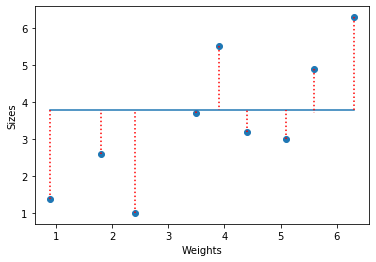

In [4]:
# impl 1
line = plt.axes()
plt.xlabel('Weights')
plt.ylabel('Sizes')
plt.scatter(weights, sizes)


line_x = np.array(weights)
line_y = np.array([avg_wt for x in sizes])

lines_lsm1 = list(zip(weights, sizes))
lines_lsm2 = list(zip(weights, line_y))

# y = mx + c
# y = 1[weights] + avg_wt

#slope, intercept = np.polyfit(line_x,line_y,1)

#print(f'slope, intercept {slope, intercept}')

#avg line
line.plot(line_x, line_y) 


#line.plot(line_x, 0.25 * line_x + 1, label = 'l1')
#line.plot(line_x, 0.50 * line_x + 1)
#line.plot(line_x, 0.75 * line_x + 1)

line_lsm = []


for x, s in zip(weights, sizes):
    lsm_x = []
    lsm_y = []
    
    if s > avg_wt:
        inc_count = -0.1
    else:
        inc_count = 0.1
    
    for y in (np.arange(s, avg_wt + inc_count, inc_count)):
        lsm_x.append(round(x,1))
        lsm_y.append(round(y,1))
    line.plot(lsm_x, lsm_y, c = "r", ls = ":")
    
line_x = weights
#print(line_x)
#line_x = map(lambda x:x+1, line_x)
line_x = [round((x+1/10),1) for x in line_x]
#print(line_x)

#print('\n', line_y)
#line_y = [round((x+1/10),1) for x in line_y]
#print(line_y)

#line.plot(line_x, line_y)



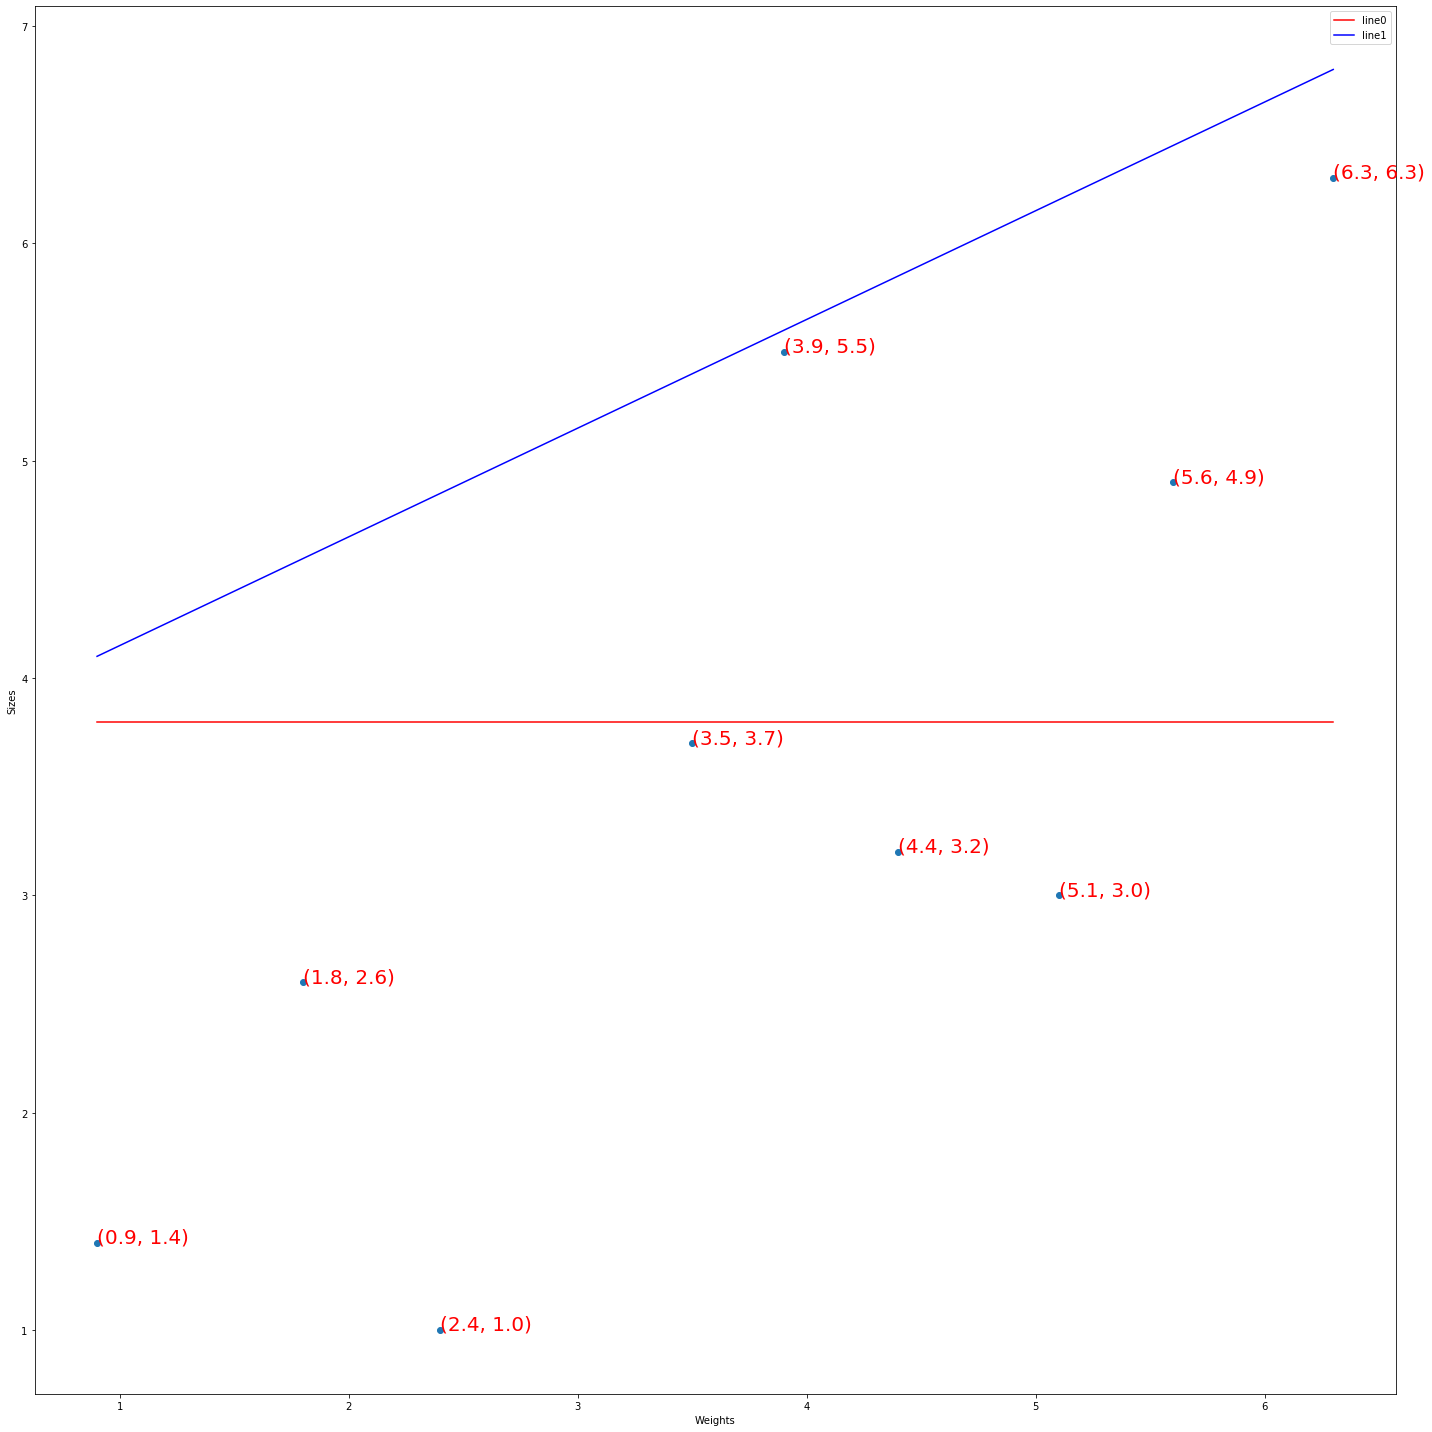

In [16]:
# impl 2
ax = plt.axes()
plt.xlabel('Weights')
plt.ylabel('Sizes')
#plt.rcParams["figure.figsize"] = [20, 20]
#plt.rcParams["figure.autolayout"] = True
plt.scatter(weights, sizes)

annotate_style = dict(size=20, color='red')
for x, y in zip(weights, sizes):
    # Annotation
    ax.text(x,y, f'({x}, {y})', **annotate_style)
    
total_lines = 2
line_colors = ['red', 'blue', 'green', 'orange']
slopes = np.linspace(0,1, total_lines + 1)
intercepts = np.linspace(min(sizes), max(sizes), total_lines + 1)
y_lines = []

for line, line_color, slope, intercept in zip(range(total_lines), line_colors, slopes, intercepts):
    
    if line == 0: # plot avg line
        x_coordinates = np.array(weights)
        y_coordinates = np.array([avg_wt for x in sizes])
    else:
        y_coordinates = slope * x_coordinates + intercept
    
    ax.plot(x_coordinates, y_coordinates , c = line_color, label = 'line' + str(line))
    y_lines.append(y_coordinates)
    #print(y_lines)
    
    continue
    
    for x, s in zip(weights, y_lines[line]):
        print(f'x : {x} s : {s}')
        continue
        
        lsm_x = []
        lsm_y = []

        if s > avg_wt:
            inc_count = -0.1
        else:
            inc_count = 0.1

        for y in (np.arange(s, avg_wt + inc_count, inc_count)):
            lsm_x.append(round(x,1))
            lsm_y.append(round(y,1))
        ax.plot(lsm_x, lsm_y, c = line_color, ls = ":")

line_x = weights
line_x = [round((x+1/10),1) for x in line_x]

lines_lsm1 = list(zip(weights, sizes))
lines_lsm2 = list(zip(weights, line_y))

ax.legend()


In [5]:
def calc_sum_of_squared_residuals(x1, y1, x2, y2):
    return round(((x2 - x1) ** 2 + (y2 - y1) ** 2), 1)

In [6]:
def calc_slope(x1, y1, x2, y2):
    if (x2 - x1) != 0:
        return (y2-y1)/(x2-x1)
    else:
        return 0

In [38]:
ssr = 0 # sum of squared residuals

for tup_lsm1, tup_lsm2 in zip(lines_lsm1, lines_lsm2):
    x1 = tup_lsm1[0]
    y1 = tup_lsm1[1]
    
    x2 = tup_lsm2[0]
    y2 = tup_lsm2[1]
    
    ssr = round(ssr + calc_sum_of_squared_residuals(x1, y1, x2, y2),1)
    print(tup_lsm1, tup_lsm2, x1, y1, x2, y2, ssr)

ssr = round(ssr, 1)

slope = calc_slope(x1, y1, x2, y2)

print(f'sum of squared residuals is : {ssr} slope {slope}')

(0.9, 1.4) (0.9, 3.8) 0.9 1.4 0.9 3.8 5.8
(1.8, 2.6) (1.8, 3.8) 1.8 2.6 1.8 3.8 7.2
(2.4, 1.0) (2.4, 3.8) 2.4 1.0 2.4 3.8 15.0
(3.5, 3.7) (3.5, 3.8) 3.5 3.7 3.5 3.8 15.0
(3.9, 5.5) (3.9, 3.8) 3.9 5.5 3.9 3.8 17.9
(4.4, 3.2) (4.4, 3.8) 4.4 3.2 4.4 3.8 18.3
(5.1, 3.0) (5.1, 3.8) 5.1 3.0 5.1 3.8 18.9
(5.6, 4.9) (5.6, 3.8) 5.6 4.9 5.6 3.8 20.1
(6.3, 6.3) (6.3, 3.8) 6.3 6.3 6.3 3.8 26.3
sum of squared residuals is : 26.3 slope 0


In [43]:
no_of_lines = 4
slopes = np.linspace(0,1, no_of_lines + 1)
intercepts = np.linspace(min(sizes), max(sizes), no_of_lines + 1)

for s, i in zip(slopes, intercepts):
    print(s, i)



0.0 1.0
0.25 2.325
0.5 3.65
0.75 4.975
1.0 6.3


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>
<h1><center>Thank you!!! </center></h1>
<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>